# Agenda



__Part - I__


- Bias - Variance Trade-Off Review

- Cross Validation

    - Validation Set
    
    - Leave one out CV
    
    - K-fold CV       


__Part - II__

- Model Selection

- Motivation and discussing why we need model selection



__Part - III__

- Regularization

    - Ridge
    
    - Lasso

# Part-I: Cross Validation

- Training Data: The data set used to train machine learning algorithm

- Test Data: The data set that is unseen by the algorithm

- Training Error: Error made by the algorithm computed using the training data.

- Test Error: The average error that results from using a ML algorithm to predict the response on a new observation.

__Bias Variance Trade-Off__

- Bias: How much the average prediction over different data sets differ from the actual value.

- Variance: How much the predictions would change for different data sets.

__Goal__

- Low test error => Low variance + low bias

<center><img src="https://hsto.org/files/281/108/1e9/2811081e9eda44d08f350be5a9deb564.png" width=450, height=350></center>

 More excplicitly we say that the 'average' test error can be decompose into three pieces.

<img src="images/bias_variance.png" cap="Transformed dataset"  width='400'/>

__Why does this matter?__

[__Bias - Variance Trade-Off__](http://scott.fortmann-roe.com/docs/BiasVariance.html)


<img src="images/bias_variance_trade_off.png" alt="Bias-Variance" style="width: 750px;"/>

__Why does this matter - 2?__

- Complex models will give low training errors but not necessarily low test errors.

__Goal of ML__

- Choose a model with low test error!

__Question__

- How can we estimate test error?

<img src="images/train_test_error.png" style="width: 750px;"/>

Source: ISLR - p31

__How to estimate test error?__

- With train-test split

<img src="images/traintest.jpg" style="width: 750px;"/>

## Validation Set Approach

__Problem__

- If we could choose one model then we can estimate the test error. 

- However we cannot use test data to compare different models!

- Because this would lead to over-fitting to test data this time.

__Solution__

- Set aside another random part of the data set and compare different models on this dataset.

- Once we choose a good model with validation data then we can estimate the final performance of this model on test set.

<img src="images/sklearn_validation.png" style="width: 750px;"/>

<img src="images/validation_set_approach.jpg" style="width: 750px;"/>

[Source](https://www.datavedas.com/holdout-cross-validation/)

__What might be the possible drawbacks of this approach?__

Let's discuss

In [6]:
## Overestimate test error - because trained on few samples

## high variance of the estimations -- because of corralated datasest

## Leave-One-Out 

- Remedy to the problems of Validation Set Approach

<img src="images/loocv.png" style="width: 750px;"/>

[Image Source](https://medium.com/datadriveninvestor/k-fold-and-other-cross-validation-techniques-6c03a2563f1e)

__Advantages__

- Far less bias - Each time we are using almost all of the training set.

- There is no randomness in the process so less variance.

__Disadvantages__

- Computationally very expensive

## K-fold Cross-Validation

(Best of both worlds!!)

- Split data into k-folds randomly and each fold has approximately the same size.

- Each time hold one fold as validation and the rest as training. 

- Apply this procedure until every fold becomes a validation set once.

<img src="images/sklearn_cv.png" style="width: 750px;"/>

__Advantages of k-fold CV__

- Computationally manageable

- Lower bias then validation set approach

- Lower variance then LOOCV

- Every data point is used in training k-1 times

- Every data point is used as test at least once.



__Disadvantages__

- Sometimes even k-fold CV is very computationally expensive.

## Part-III: Regularization Techniques

__Linear Model__


$$ Y = \beta_{0} + \beta_{1}X_1 + \beta_{2}X_{2} + \cdots + \beta_{p}X_{p} + \varepsilon $$

 - We train model to understand the paramaters $\beta_{i}$ 
 
 - Use linear algebra or gradient descent to find parameters to minimize:
 
 $$ J(\beta) = \sum\limits_{i=0}^{n} (y_{i} - \beta_{0} - \beta_{1}X_{i1} - \beta_{2}X_{i2} - \cdots - \beta_{p}X_{ip})^{2} $$

__Ridge regularization__

Instead of minimizing $J(\beta)$ (least squares method), we will minimize:

$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p} \beta_{i}^{2} $$

__Lasso regularization__

Instead of minimizing $J(\beta)$, we will minimize:

$$ J_{\lambda}(\beta) = J(\beta) + \lambda\sum_{i=1}^{p}| \beta_{i} | $$

- Why?

    - Reduces complexity
    
    - Reduce the chance of ovefitting.
    
    - Reduces model's variance at the expense of introducing small bias
    
    - Increases model's interprettability.
    
    - Help to deal with colinearity

##### Ridge:
- Used to prevent overfitting. 
- Not very useful when we have many features.

##### Lasso:   
- Provides sparse solutions. 
- Model of choice for modelling cases where we have large number of features. 
- Sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.


### Questions



Q. Should I do normalization for Lasso or Ridge?

A. Yes? Why?

Q. When we know that Ridge and Lasso is better than vanilla linear regression?

A. High variation in your model --> Colinearity and too many variables.

Q. How do we know whether we should choose Lasso or Ridge?

A. Most of the time they perform very similar but Lasso has the feature selection property, ridge doesn't have this.

Q: How do we choose $\lambda$?

A. [sklearn gridsearch](https://scikit-learn.org/stable/modules/grid_search.html#grid-search) for small models or random grid search for bigger models.


###### Play Ground (If time allows if not work on this on your own )

In [13]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/Credit.csv', index_col = 0)

df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [16]:
df2 = df.select_dtypes(exclude='object').loc[:]
df2.drop(columns = 'Balance', inplace = True)

X = df2.values
y = df.Balance.values.reshape(-1,1)

print('Shape of the dataset is:', X.shape)

Shape of the dataset is: (400, 6)


In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=3)

poly_X = poly.fit_transform(X)

In [34]:
poly_X.shape

(400, 84)

From a customers age, education, income etc can we predict their credit card balance?

Note for the sake of simplicity we omit the categorical predictors.

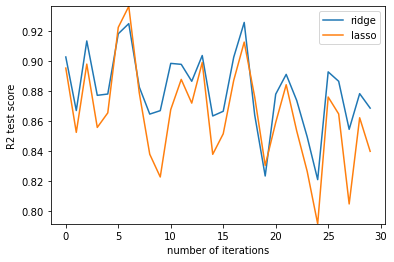

In [27]:

def model_experiment(num_iter = 5, 
                     models = ['ols', 'ridge', 'lasso'], alpha= 10, 
                     complexity = 'simple', degree = 3):
    
    x_axis = np.arange(num_iter)
    y_ols_test = []
    y_lasso_test = []
    y_ridge_test = []
    sample_models = {}
    for i in range(num_iter):
        
        if complexity == 'simple':
            ## split train_test 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        elif complexity == 'polynomial':
            ## Create higher order terms
            poly = PolynomialFeatures(degree=degree)
            Xp = poly.fit_transform(X)
            ## test-train split
            X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size = 0.2)


        ## Standard scale mean = 0, variance = 1
        sd = StandardScaler()

        sd.fit(X_train)

        X_train = sd.transform(X_train)

        X_test = sd.transform(X_test)

        ## Be careful about the leakage

        ## Vanilla model
        if 'ols' in models:
            lr = LinearRegression()

            lr.fit(X_train, y_train)
            
            sample_models['ols'] = lr

            test_score = lr.score(X_test, y_test)
            train_score = lr.score(X_train, y_train)

            y_ols_test.append(test_score)

    #       print('test score OLS is %.2f and train score is %.2f'%(test_score, train_score))

        if 'ridge' in models:
            ## Ridge in the simple setting
            ridge = Ridge(alpha = alpha, max_iter= 10000)
            ridge.fit(X_train, y_train)
            sample_models['ridge'] = ridge
            y_ridge_test.append(ridge.score(X_test, y_test))
    #       print('test score Ridge is %.2f and train score is %.2f'%(ridge.score(X_test, y_test),
    #                                                             ridge.score(X_train, y_train)))

        if 'lasso' in models:
            ## Lasso in the simple setting
            lasso = Lasso(alpha = alpha, max_iter= 10000)

            lasso.fit(X_train, y_train)
            
            sample_models['lasso'] = lasso
            
            y_lasso_test.append(lasso.score(X_test, y_test))
    #       print('test score Lasso is %.2f and train score is %.2f'%(lasso.score(X_test, y_test),
    #                                                             lasso.score(X_train, y_train)))

        i+=1
    if 'ols' in models:
        plt.plot(y_ols_test, label = 'ols')
    if 'ridge' in models:
        plt.plot(y_ridge_test, label = 'ridge')
    if 'lasso' in models:
        plt.plot(y_lasso_test, label = 'lasso')
    plt.ylabel('R2 test score')
    plt.xlabel('number of iterations')
    all_results = y_ols_test + y_lasso_test + y_ridge_test
    plt.ylim((np.min(all_results), np.max(all_results)))
    
    plt.legend()
    return sample_models

trained_models = model_experiment(num_iter=30, alpha = 15,
                                   models = ['ridge', 'lasso'], 
                                   complexity= 'polynomial', degree = 2)


In [29]:
# After run model_experiment with complexity == 'polynomial'

# lr_ols = trained_models['ols']
lr_lasso = trained_models['lasso']
lr_ridge =trained_models['ridge']

# check the coefficients from Lasso

print(lr_ridge.coef_)
print(lr_lasso.coef_)

# compare them with OLS/Ridge models.


[[  0.         -67.40026984 110.74952522 102.14947602  17.20016743
    8.56133318 -14.521598   -44.53442939 -42.28737056 -45.33830366
  -51.15521592 -36.58742853 -60.15477322  94.65869554  88.41459754
   43.71404105  25.47142768  71.2382734   82.01078119  34.38064949
   17.07901175  59.26206046  -4.78019009 -13.99874102 -15.42073865
  -25.64256556   0.55135447 -16.27917902]]
[   0.         -194.52188107  247.92707975  218.12114167    0.
   -0.           -0.           -0.           -0.           -0.
   -0.          -17.63249896   -0.           66.39968059    0.
   22.9931188     0.           10.79826066    0.            0.
    0.            0.            0.           -0.            0.
   -0.           -0.           -0.        ]


###### Effect of Scaling data

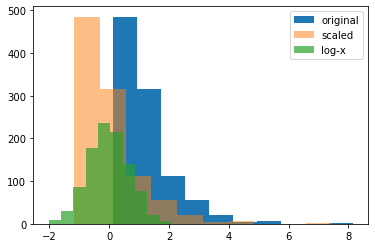

In [19]:
x = np.random.lognormal(mean = 0, sigma = 0.7, size = 1000)

plt.hist(x, label = 'original')


x_scaled = (x - x.mean())/x.std(ddof = 1)

log_x = np.log(x)

plt.hist(x_scaled, label = "scaled", alpha  = 0.5)

plt.hist(log_x, label = "log-x", alpha =0.7)
plt.legend()
plt.draw()

# Review

# Extra Resources

- [A great notebook on Lasso and Ridge](https://github.com/gokererdogan/JaverianaMLCourse/blob/master/Lectures/05.pdf)

- [Another good blog post on Lasso and Ridge](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/)

- [sklearn.preprocessing.PolynomialFeatures documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

- [Toward Datascience Article](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229)

- [Andrew Ng on Regularization](https://www.youtube.com/watch?v=NyG-7nRpsW8&list=PLkDaE6sCZn6Hn0vK8co82zjQtt3T2Nkqc&index=5)

__More beginner level videos__

- [StatQuest - Cross Validation](https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer)

- [StatQuest-Regularization - I](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer)

- [StatQuest-Regularization - II](https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer)

- [Data School - Feature Selection](https://www.youtube.com/watch?v=YaKMeAlHgqQ&ab_channel=DataSchool)

- [Data School - Cross Validation](https://www.youtube.com/watch?v=6dbrR-WymjI&ab_channel=DataSchool)